In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("../data/heart_attack_data.csv")

In [3]:
import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


In [6]:
df.target.value_counts()

0    188
1    106
Name: target, dtype: int64

In [7]:
df.target.value_counts(dropna = True)

0    188
1    106
Name: target, dtype: int64

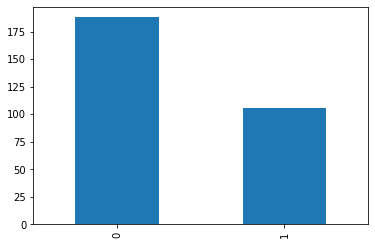

In [8]:
df.target.value_counts(dropna = True).plot(kind = 'bar');


In [9]:
missing_value_df = df.isnull().mean().to_frame()
missing_value_df.columns=["percent_missing"]
missing_value_df

,percent_missing
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.003401
chol,0.078231
fbs,0.027211
restecg,0.003401
thalach,0.003401
exang,0.003401
oldpeak,0.000000


In [10]:
cols_to_drop = list(missing_value_df[missing_value_df.percent_missing > 0.4].index)
print("number of columns to drop:", len(cols_to_drop))
print(cols_to_drop)

number of columns to drop: 3
['slope', 'ca', 'thal']


In [11]:
df.drop(cols_to_drop, axis = 1, inplace = True)
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [12]:
df.trestbps.fillna(df.trestbps.mean(), inplace=True)
df.chol.fillna(df.chol.mean(), inplace=True)
df.fbs.fillna(df.fbs.mean(), inplace=True)
df.restecg.fillna(df.restecg.mean(), inplace=True)
df.thalach.fillna(df.thalach.mean(), inplace=True)
df.exang.fillna(df.exang.mean(), inplace=True)

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [14]:
target = df["target"]
features = df.drop(["target"], axis = 1)

In [15]:
target

0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: target, Length: 294, dtype: int64

In [16]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0.0,0.0
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5
290,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0
291,56,1,4,155.0,342.000000,1.0,0.0,150.0,1.0,3.0
292,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=8888)

In [18]:
X_train.shape

(235, 10)

In [19]:
X_test.shape

(59, 10)

In [20]:
y_train.shape

(235,)

In [21]:
y_test.shape

(59,)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
# transform training data
X_train_scaled = scaler.transform(X_train)

In [25]:
X_train_scaled.shape

(235, 10)

In [29]:
X_train_scaled

array([[ 0.66180977,  0.5920935 , -0.01783973, ..., -0.39794216,
        -0.68811376, -0.65446919],
       [-0.63423436,  0.5920935 ,  1.03024439, ..., -0.39794216,
         1.45927895,  1.49208013],
       [-0.89344319,  0.5920935 , -1.06592385, ...,  0.90746636,
        -0.68811376, -0.65446919],
       ...,
       [ 1.05062301,  0.5920935 , -0.01783973, ..., -0.48496939,
         1.45927895,  0.41880547],
       [-0.37502554, -1.68892244, -1.06592385, ...,  1.77773871,
        -0.68811376, -0.65446919],
       [-1.15265202,  0.5920935 ,  1.03024439, ...,  0.47233019,
        -0.68811376, -0.65446919]])

In [30]:
clf = LogisticRegression()

In [31]:
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
y_pred = clf.predict(X_test)
print("first five predicted values:", y_pred[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [0 1 1 1 0]
first five actual values: [0, 1, 0, 0, 0]


In [33]:
accuracy_score(y_test, y_pred)
recall_score(y_test, y_pred)
precision_score(y_test, y_pred)
f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.62      0.69        40
           1       0.44      0.63      0.52        19

    accuracy                           0.63        59
   macro avg       0.61      0.63      0.61        59
weighted avg       0.67      0.63      0.64        59



array([[25, 15],
       [ 7, 12]], dtype=int64)